In [48]:
import sys
import uproot
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math
import csv
import io
import matplotlib.colors as colors
from scipy.optimize import curve_fit
from scipy.stats import pearsonr
import astropy
from astropy import stats
import itertools 

In [59]:
npath = '/Users/Clara Escanuela/OneDrive/Escritorio/MPhys_project/root_files/'
cpath = '/Users/Clara Escanuela/Downloads/'

path = cpath


def optim_bins(mult_arry):
    width_arry = np.array([])
    
    for arry in mult_arry: 
        #print(arry)
        width_temp = astropy.stats.freedman_bin_width(arry, return_bins=False)
        width_arry = np.append(width_arry, width_temp)
    
    energy_res = np.max(width_arry)
    print(energy_res)
    flat_arry = np.concatenate(mult_arry, axis=0)
    
    return int(round((np.max(flat_arry) - np.min(flat_arry)) / energy_res, 0))


def hist_weights(rates, data):
    weights = []
    i = 0

    for event in data:
        weight = (rates[i]*np.ones_like(event))/len(event) #fraction = expected events / num of events generated
        weights.append(weight)
        i += 1
    
    return weights

def root_input(path, filename):
    rTree = uproot.open(path + filename)
    
    rTree_event = rTree['event_tree']
    rTree_data = rTree['data_tree']
    #rTree_vuv = rTree['data_tree_vuv']
    
    #event_x_pos = np.array(rTree_event['event_x_pos'])
    event_E = np.array(rTree_event['event_E'])

    data_event = np.array(rTree_data['data_event'])
    #data_pmt = np.array(rTree_data['data_pmt'])
    data_time = np.array(rTree_data['data_time']) 

    data_index, count_scint = np.unique(data_event, return_counts=True)
    #split_pmt = np.split(data_pmt, np.cumsum(count_scint)) 
    split_time = np.split(data_time, np.cumsum(count_scint))

    return split_time, count_scint, event_E


def pairwise(iterable):
    "s -> (s0,s1), (s2,s3), (s4, s5), ..."
    a = iter(iterable)
    return zip(a, a)

fname_B8 = 'events_solar_delayed.root'
fname_B82 = 'events_solar_prompt.root'
fname_solar = 'events_b8.root'
fname_Ar36 = 'events_neutrons_36Ar_100000_foils.root'
fname_Ar40 = 'events_neutrons_40Ar_100000_foils.root'
fname_Rn = 'events_Rn222_100000_foils.root'
fname_AG = 'events_alphagamma_200000_foils.root'

B8_split_time, B8_scint, B8_event_E = root_input(path, fname_B8) 
B82_split_time, B82_scint, B82_event_E = root_input(path, fname_B82)
solar_split_time, solar_scint, solar_event_E = root_input(path, fname_solar) 

Ar36_split_time, Ar36_scint, Ar36_event_E = root_input(path, fname_Ar36)  
Ar40_split_time, Ar40_scint, Ar40_event_E = root_input(path, fname_Ar40)  
Rn_split_time, Rn_scint, Rn_event_E = root_input(path, fname_Rn)  
AG_split_time, AG_scint, AG_event_E = root_input(path, fname_AG)  

#########################

def comb(split_time, event_E):
    split_time_temp = []
    for x, y in pairwise(split_time):
        split_time_temp.append(np.append(x,y))
    
    event_E_temp = []
    for x, y in pairwise(event_E):
        event_E_temp.append(x+y)
    
    return split_time_temp, event_E_temp

B8_split_time, B8_event_E_ = comb(B8_split_time, B8_event_E)
AG_split_time, AG_event_E = comb(AG_split_time, AG_event_E)
outputtime = np.hstack((B8_split_time[0:40000], B82_split_time[0:60000]))

print(B8_event_E[0:10])
outputE = np.hstack((B8_event_E[0:40000], B82_event_E[0:60000]))

B8_split_time = outputtime
B8_event_E = outputE

print(B82_event_E[0:100])

[6.95329094e-310 4.78937843e+000 7.12543059e+000 6.23418036e+000
 7.04332147e+000 1.05010409e+001 8.21351680e+000 5.89739507e+000
 7.49709965e+000 5.70132497e+000]
[10.16978706  7.23345403  7.53400252  7.85607641  6.18574477  9.80588948
  6.25282707  7.12349077 11.30531172  3.92973717  6.41882975  6.50163222
 10.27536955  9.46626418  6.61186606  6.48243737  8.92169253  6.59274944
  6.96620514  8.20836667  8.7190597   6.69079204  5.85952279  7.56030574
  6.32917404  5.79868511  6.28352668  6.56558361  4.4256165   7.71636228
  2.19629918  7.17076268  7.71884615  6.6856757   8.77349905  6.56215046
  4.57454822  2.49683927  7.51240781  7.00953646  7.21441487  4.35383703
  5.93015615  4.45307586  4.46821068  3.48528928  6.31373653  5.60710397
  9.16065584  5.2097852   8.98943009  4.77679896  8.17411769  7.11691647
  9.61082697  9.71730634  1.55956954  5.97638559  6.88611546  4.77633225
  7.16196879  5.98214928  8.31205092  3.8315415   4.77177433  6.98241732
  2.53891665  8.93110377  7.51451

C:\Users\Clara Escanuela\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


11.667248385911847


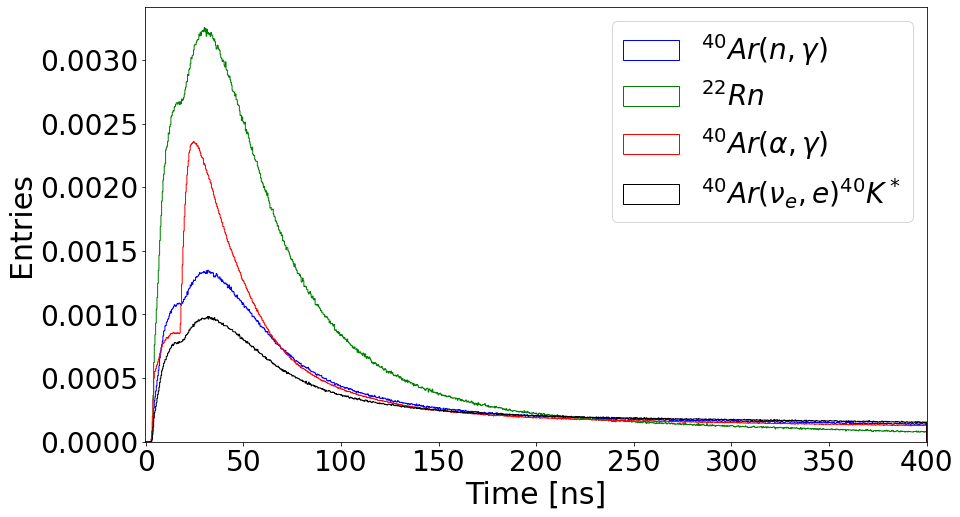

In [60]:
# Plot time distribution

data = [np.concatenate(B8_split_time)*1000, np.concatenate(AG_split_time)*1000, np.concatenate(Rn_split_time)*1000, np.concatenate(Ar40_split_time)*1000]
rates = [1, 1, 1, 1] # normalise

num_bins = optim_bins(data)

labels = [r'$^{40}Ar(\nu_e, e)^{40}{K}^*$', r'${}^{40} Ar(\alpha, \gamma)$', r'${}^{22} Rn$', r'${}^{40} Ar(n, \gamma)$']
colors = ['black', 'red', 'green', 'blue']

plt.figure(figsize=(14,8))

n, bins, patches = plt.hist(data, stacked = False, color=colors, bins=num_bins, range=[0, 400], label=labels, histtype='step', weights=hist_weights(rates, data))

n0 = np.max(n[0])/np.max(n[2])
n1 = np.max(n[1])/np.max(n[2])
n3 = np.max(n[3])/np.max(n[2])

plt.xlabel('Time [ns]',fontsize=30)
plt.xticks(fontsize=28)
plt.ylabel('Entries',fontsize=30)
plt.yticks(fontsize=28)
#plt.axvline(x=0.2, linestyle = "dashed", color="black", linewidth = 0.9)
plt.xlim(-0.1, 400)

plt.legend(fontsize=28)

plt.show()

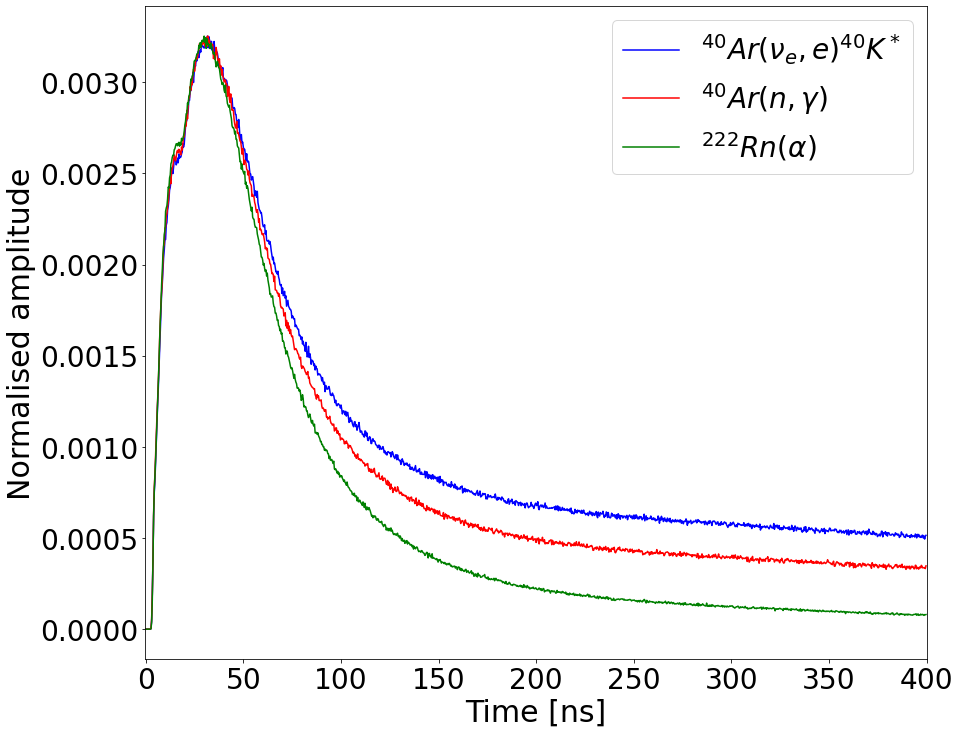

In [61]:
plt.figure(figsize=(14,12))

plt.plot(bins[0:num_bins], n[0][0:num_bins]/n0, label=r'$^{40}Ar(\nu_e, e)^{40}{K}^*$', color='blue')
plt.plot(bins[0:num_bins], n[3][0:num_bins]/n3, label=r'${}^{40} Ar(n, \gamma)$', color='red')
plt.plot(bins[0:num_bins], n[2][0:num_bins], label=r'${}^{222} Rn (\alpha)$', color='green')

plt.xlabel('Time [ns]',fontsize=30)
plt.xticks(fontsize=28)
plt.ylabel('Normalised amplitude',fontsize=30)
plt.yticks(fontsize=28)
#plt.axvline(x=0.2, linestyle = "dashed", color="black", linewidth = 0.9)
#plt.axvline(x=200, color='black', linestyle='dashed', linewidth=0.7)
plt.xlim(-0.1, 400)

plt.legend(fontsize=28)

plt.show()

0.005130025062777409


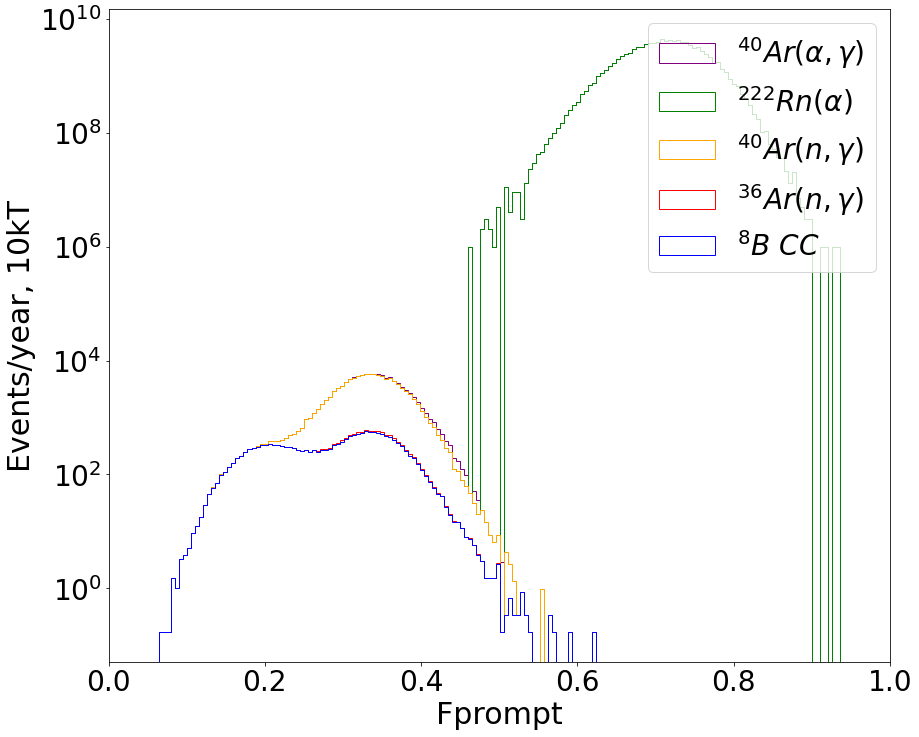

In [72]:
#Fprompt

def Fprompt(split_time, time):

    fprompt = np.array([])

    for event in split_time:
        if event.size > 0:
            fprompt = np.append(fprompt, len(event[event <= time*0.001])/len(event))
            
    return fprompt

#####################

max_time = 200

Fprompt_B8 = Fprompt(B8_split_time, max_time)

Fprompt_Ar36 = Fprompt(Ar36_split_time, max_time)
Fprompt_Ar40 = Fprompt(Ar40_split_time, max_time)
Fprompt_Rn = Fprompt(Rn_split_time, max_time)
Fprompt_AG = Fprompt(AG_split_time, max_time)


rates = [26700*0.64, 10**8*0.006*(1/10**3), 10**8*0.994*(1/10**3), 10**(11), 3000] # normalise

data = [Fprompt_B8, Fprompt_Ar36, Fprompt_Ar40, Fprompt_Rn, Fprompt_AG]

labels = [r'${}^8 B\ CC$', r'${}^{36} Ar(n, \gamma)$', r'${}^{40} Ar(n, \gamma)$', r'${}^{222} Rn(\alpha)$', r'${}^{40} Ar(\alpha, \gamma)$']
colors = ['blue', 'red', 'orange', 'green', 'purple']

plt.figure(figsize=(14,12))

num_bins = optim_bins(data)

n_, bins_, patches_ = plt.hist(data, stacked = True, color=colors, bins=num_bins, label=labels, histtype='step', weights=hist_weights(rates, data))

plt.xlabel('Fprompt',fontsize=30)
plt.xticks(fontsize=28)
plt.ylabel('Events/year, 10kT',fontsize=30)
plt.yticks(fontsize=28)
plt.xlim([0, 1])
plt.yscale('log')

plt.legend(fontsize=28)

plt.show()

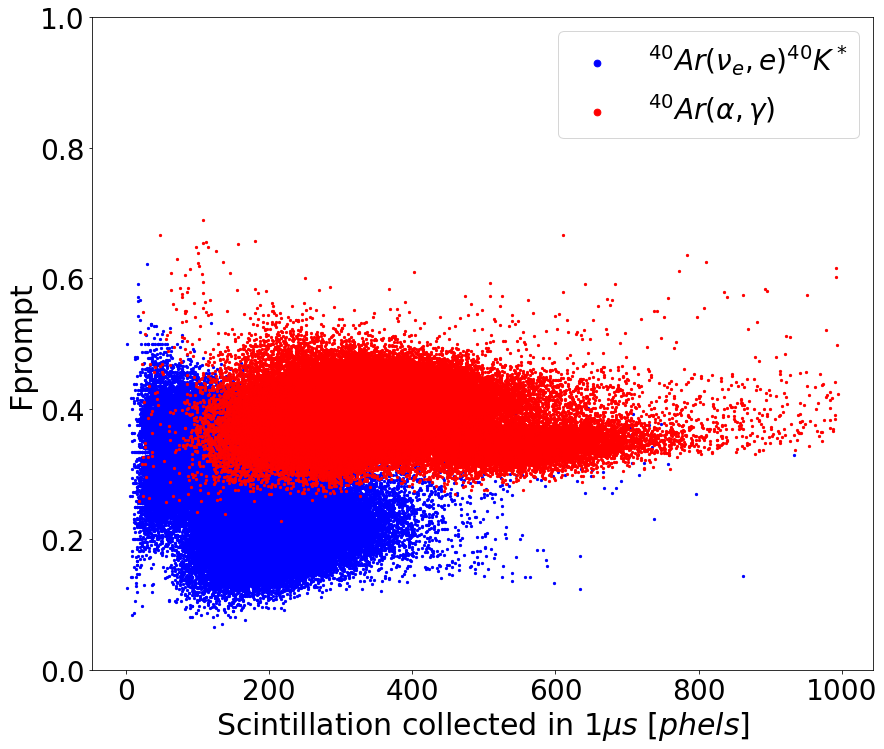

In [73]:
#########################

def scint_timewindow(split_time, set_time):
    #time is in microseconds
    i = 0
    scint_output = np.array([])

    for time in split_time:
        mask = (time <= set_time)
    
        if time.size > 0:
            scint_output = np.append(scint_output, len(time[mask])) # number of photons detected in time window
        i += 1
    
    return scint_output


t_window = 1

signl_wind = scint_timewindow(B8_split_time, t_window)
bkg_wind = scint_timewindow(AG_split_time, t_window)

#########################

plt.figure(figsize=(14,12))

sig_label = r'$^{40}Ar(\nu_e, e)^{40}{K}^*$'
bkg_label = r'${}^{40} Ar(\alpha, \gamma)$'

num_mask = 2000
scint_mask = 1000
plt.scatter(signl_wind[signl_wind < scint_mask], Fprompt_B8[signl_wind < scint_mask], s = 20, label=sig_label, marker='.', color='blue')

plt.scatter(bkg_wind[bkg_wind < scint_mask], Fprompt_AG[bkg_wind < scint_mask], s = 20, label=bkg_label, marker='.', color='red')
#plt.axhline(y=0.2, color='black', linestyle='dashed', linewidth=0.7)

plt.ylabel('Fprompt', fontsize=30)
plt.xlabel(r'Scintillation collected in $1 \mu s$ [$phels$]', fontsize=30)

plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
plt.legend(markerscale=3, fontsize=28)
plt.ylim(0,1)

plt.show()


In [74]:
bin_width = bins_[1] - bins_[0]

totaln = n_[1] + n_[2] + n_[3] + n_[4]

total_sign = bin_width * sum(n_[0])
total_back = bin_width * sum(totaln)

sign = bin_width * sum(n_[0][np.where(bins_<=0.2)])
back = bin_width * sum(totaln[np.where(bins_<=0.2)])

print(sign/total_sign)
print(back)

0.17198000000015884
61.342146641693525


In [75]:
print(len(Fprompt_B8[Fprompt_B8<=0.2]))
print(len(B8_event_E))

16061
100000


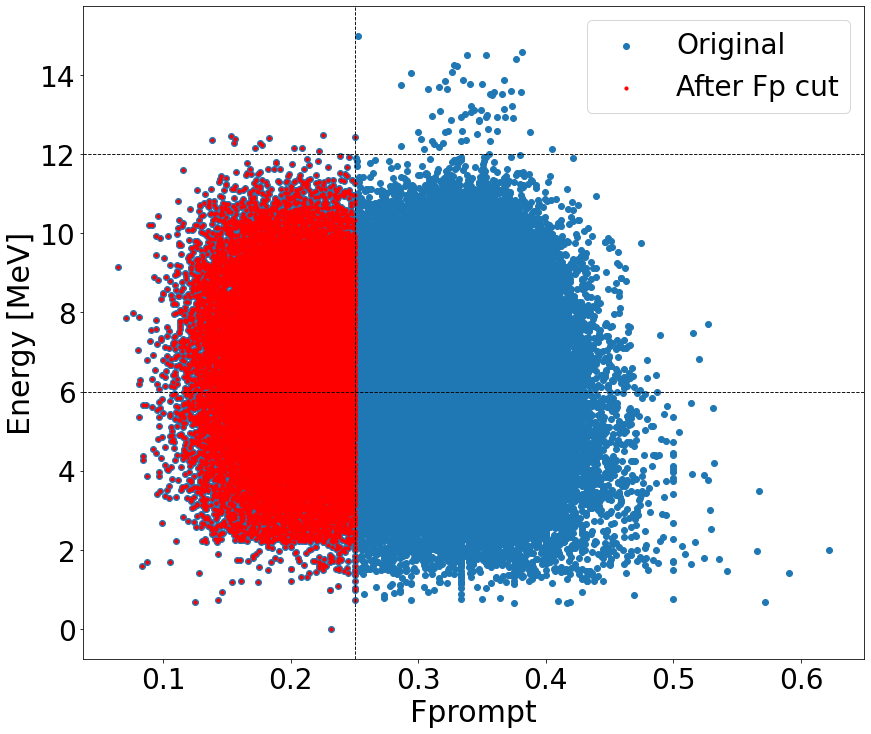

In [76]:
plt.figure(figsize=(14,12))

plt.scatter(Fprompt_B8, B8_event_E, label='Original')
#print(Fprompt_B8[Fprompt_B8<=0.2])
#print(B8_event_E[Fprompt_B8<=0.2])
plt.scatter(Fprompt_B8[Fprompt_B8<=0.25], B8_event_E[Fprompt_B8<=0.25], color='red', s=10, label='After Fp cut')

plt.xlabel('Fprompt',fontsize=30)
plt.xticks(fontsize=28)
plt.ylabel('Energy [MeV]',fontsize=30)
plt.yticks(fontsize=28)
plt.axvline(x=0.25, linestyle = "dashed", color="black", linewidth = 0.9)
plt.axhline(y=12, linestyle = "dashed", color="black", linewidth = 0.9)
plt.axhline(y=6, linestyle = "dashed", color="black", linewidth = 0.9)
#plt.xlim(0, 10)

plt.legend(fontsize=28)

plt.show()

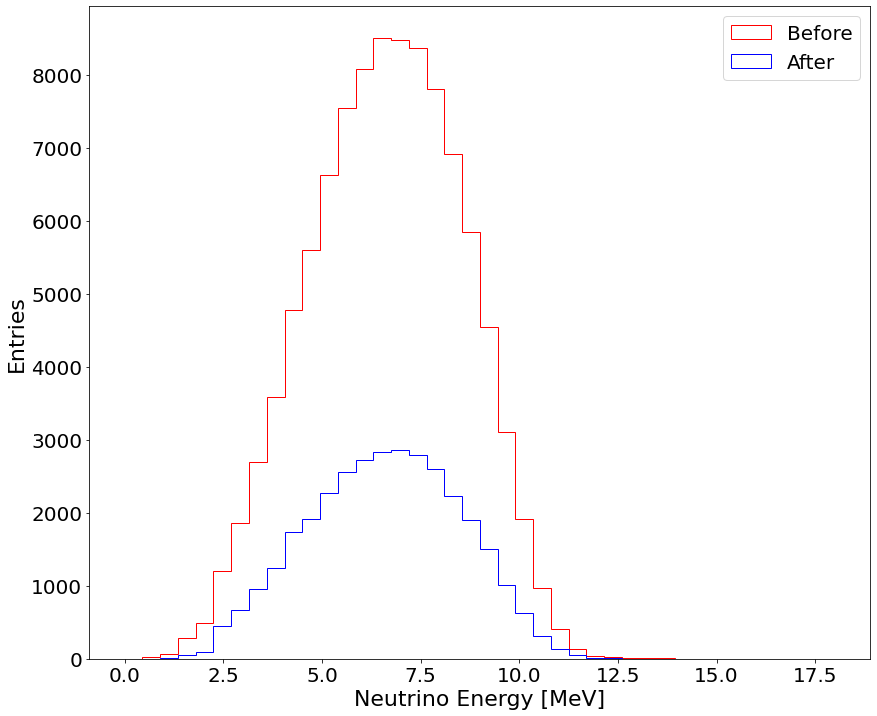

In [77]:
plt.figure(figsize=(14,12))

#data = [B8_event_E, B8_event_E[Fprompt_B8<=0.2]]

num_bins = 40 #optim_bins([B8_event_E])

#Gaussian function
def gauss_function(x, a, x0, sigma):
    return a*np.exp(-((x)-x0)**2/(2*sigma**2))


#n, bins, patches = plt.hist(data, stacked = False, bins=num_bins, label=['Before', 'After'], range=(0,18), histtype='step', color=['red', 'blue'])

n_before, bins_before, patches_before = plt.hist(B8_event_E ,stacked = False, bins=num_bins, label='Before', range=(0,18), histtype='step', color='red')
n_after, bins_after, patches_after = plt.hist(B8_event_E[Fprompt_B8<=0.25] ,stacked = False, bins=num_bins, range=(0, 18), label='After', histtype='step', color='blue')

plt.xlabel('Neutrino Energy [MeV]',fontsize=22)
plt.xticks(fontsize=20)
plt.ylabel('Entries',fontsize=22)
plt.yticks(fontsize=20)
#plt.axvline(x=0.2, linestyle = "dashed", color="black", linewidth = 0.9)
#plt.xlim(0, 10)

plt.legend(fontsize=20)

plt.show()

[1.         0.16666667 0.1884058  0.19217082 0.19315895 0.36951118
 0.35967742 0.35377183 0.34818942 0.36361733 0.34076717 0.34237492
 0.33907057 0.33745517 0.33278515 0.33726137 0.33361234 0.33376025
 0.32306134 0.32467532 0.33238011 0.32432432 0.32689295 0.31747673
 0.32678133 0.37142857 0.25       0.42857143 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]


C:\Users\CLARAE~1\AppData\Local\Temp/ipykernel_17804/3520443819.py:8: RuntimeWarning: invalid value encountered in double_scalars
  efficiency = n_after[i]/n_before[i]
C:\Users\CLARAE~1\AppData\Local\Temp/ipykernel_17804/3520443819.py:17: RuntimeWarning: divide by zero encountered in double_scalars
  std = np.sqrt((1/nb**2)*((na)*(1-na/nb)))
C:\Users\CLARAE~1\AppData\Local\Temp/ipykernel_17804/3520443819.py:17: RuntimeWarning: invalid value encountered in double_scalars
  std = np.sqrt((1/nb**2)*((na)*(1-na/nb)))


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

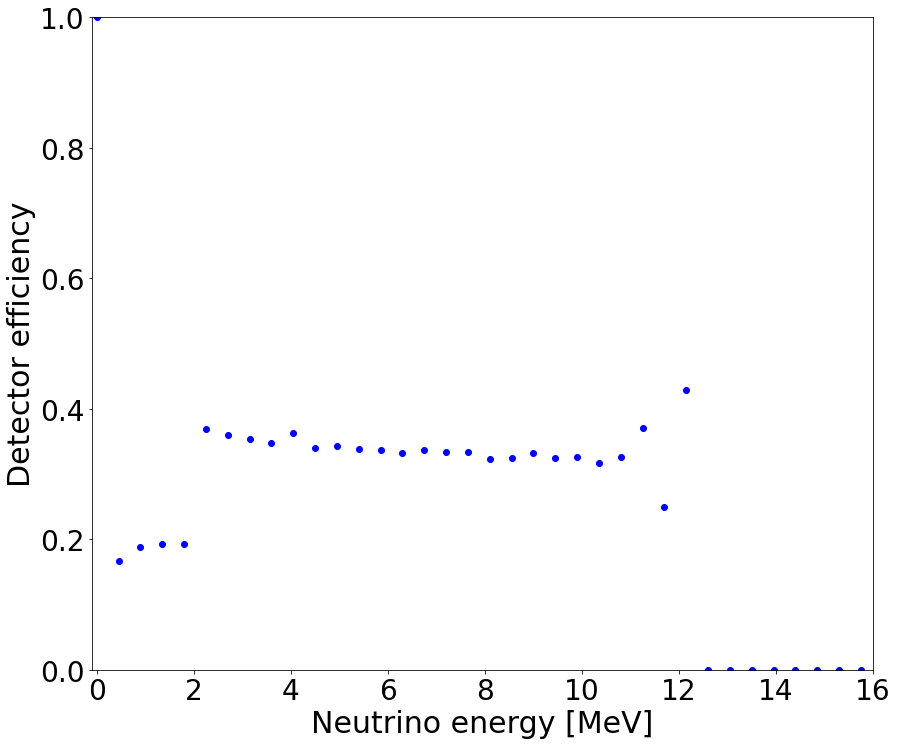

In [78]:
eff_ener = np.array([])
err_eff=np.array([])
energy = np.linspace(0, 18, num_bins)

bin_width = bins_before[0] - bins_before[1]

for i in range(0, num_bins):
    efficiency = n_after[i]/n_before[i]
    eff_ener = np.append(eff_ener, efficiency)
    
def std(na, nb):
    #Bayesian statistics
    return np.sqrt(((na+1)*(na+2))/((nb+2)*(nb+3))-(na+1)**2/(nb+2)**2)

def errors_bin(na, nb):
    #Binomial errors
    std = np.sqrt((1/nb**2)*((na)*(1-na/nb)))
    return std

for i in range(0, num_bins):
    err_eff = np.append(err_eff, (errors_bin(n_after[i], n_before[i])))


eff_ener[np.isnan(eff_ener)] = 0 
err_eff[np.isnan(err_eff)] = 0 

def sigmoid(x, a, b, c, d, e):
    return a/(d + np.exp(-b*x+c))+e

plt.figure(figsize=(14,12))

popt, pcov = curve_fit(sigmoid, bins_before[0:num_bins-1], eff_ener[0:num_bins-1])

print(eff_ener)

#plt.plot(bins_before[0:num_bins],sigmoid(bins_before[0:num_bins], *popt), color='blue')
#plt.errorbar(bins_before[0:num_bins], sigmoid(bins_before[0:num_bins], *popt), yerr=err_eff, fmt='o', color='blue', markersize=5, capsize=5)
plt.scatter(bins_before[0:num_bins-1], eff_ener[0:num_bins-1], color='blue')

plt.xlim(-0.1, 16)
plt.ylim(0, 1)

plt.ylabel('Detector efficiency', fontsize=30)
plt.xlabel(r'Neutrino energy [MeV]', fontsize=30)
#plt.yscale('log')
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
#plt.legend(fontsize=28)